In [ ]:
###################################
#            PACKAGES             #
###################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import logging
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno




In [ ]:
##################################################
# T1.1.2. LOADING DATASET & EXAMINIG THE DATASET #      
##################################################
flu_df = pd.read_csv('/Users/serenakwakye-mintah/training_set_features.csv') 
flu_df2 = pd.read_csv('/Users/serenakwakye-mintah/training_set_labels.csv') 

In [2]:
import sys
print(sys.executable)


/usr/local/bin/python3


In [4]:
flu_df = pd.merge(flu_df, flu_df2, on='respondent_id', how='outer')


In [ ]:
###################################
#        DIMENSIONS & INFO        #
###################################
print(flu_df.shape)
flu_df.describe()
print(f"Dataset shape: {flu_df.shape}")
print(flu_df.dtypes)


(26707, 38)
Dataset shape: (26707, 38)
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                     

True
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4

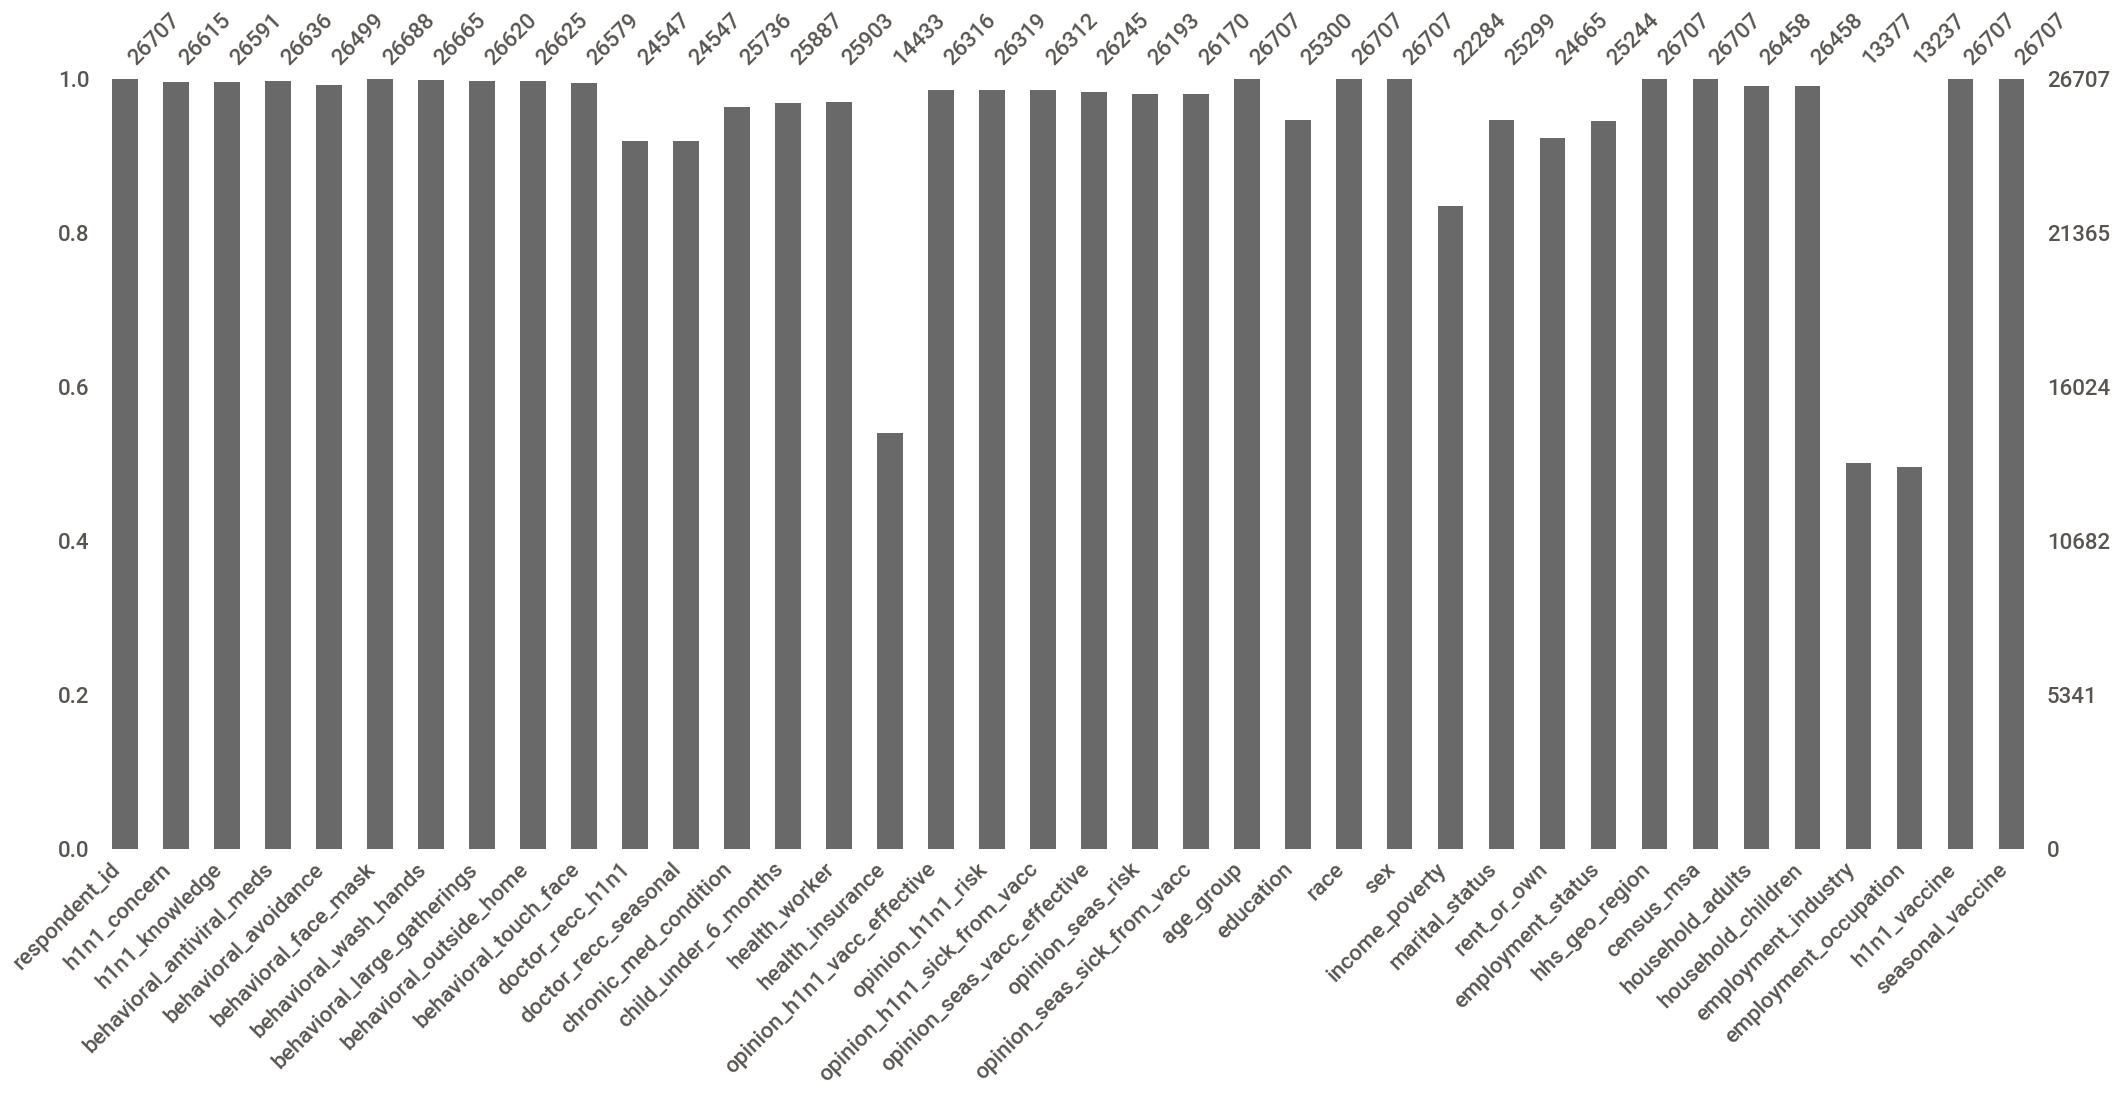

In [ ]:
###################################
#         MISSING VALUES          #
###################################
print(flu_df.isnull().values.any())
print(flu_df.isnull().sum())

msno.bar(flu_df)
plt.show()


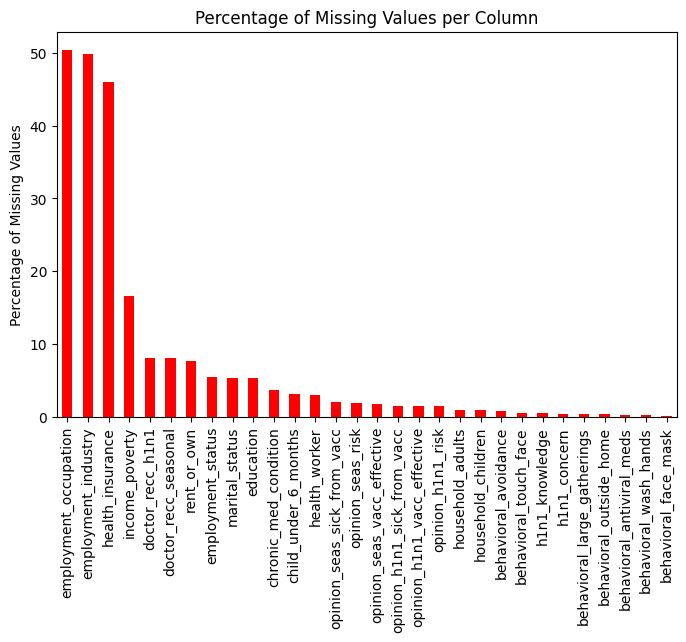

In [16]:
missing_values = (flu_df.isnull().sum() / len(flu_df)) * 100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(8,5))
missing_values.plot(kind='bar', color='red')
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values per Column")
plt.show()


In [ ]:
###################################
#       PROFILE SUMMARY           #
###################################
import sweetviz as sv

report = sv.analyze(flu_df)
report.show_html("dataset_profile.html")



                                             |          | [  0%]   00:00 -> (? left)

Report dataset_profile.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
##################################################
# T1.1.3. SUMMARY STATS FOR FEATURES             #      
##################################################

(26707, 36)
       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214   

In [15]:
num_cols = flu_df.select_dtypes(include=['number']).columns
print("Numerical columns:", num_cols)

num = flu_df.select_dtypes(include=['number'])
summary_stats = num.describe()
print(summary_stats)

Numerical columns: Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')
       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.

In [ ]:
##################################################
#    VARIABLE DISTRIBUTIONS AND CLASS BALANCE    #      
##################################################

print(flu_df['h1n1_vaccine'].value_counts(normalize=True) * 100)
h1n1_dist = flu_df['h1n1_vaccine'].value_counts().reset_index()
h1n1_dist.columns = ['Class', 'Count']
h1n1_dist['Percentage'] = (h1n1_dist['Count'] / h1n1_dist['Count'].sum()) * 100
print(h1n1_dist)


Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [ ]:
print(flu_df['seasonal_vaccine'].value_counts(normalize=True) * 100)
seaonal_dist = flu_df['seasonal_vaccine'].value_counts().reset_index()
seaonal_dist.columns = ['Class', 'Count']
seaonal_dist['Percentage'] = (seaonal_dist['Count'] / seaonal_dist['Count'].sum()) * 100
print(seaonal_dist)

In [ ]:
targets = ['h1n1_vaccine', 'seasonal_vaccine']

colors = ['#1f77b4', '#d3d3d3']
for col in targets:
    counts = flu_df[col].value_counts()
    
    counts = counts.sort_index()
    
    labels = ['No Flu Shot (0)', ' Flu Shot (1)']
    explode = [0.05] * len(counts)

    plt.figure(figsize=(6,6))
    wedges, texts, autotexts = plt.pie(
        counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],
        explode=explode,
        shadow=True
    )

    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.legend(wedges, labels, title="Classes", loc="upper right", fontsize=10)
    plt.show()

<bound method DataFrame.info of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [14]:
cat = flu_df.select_dtypes(include=['object', 'category'])

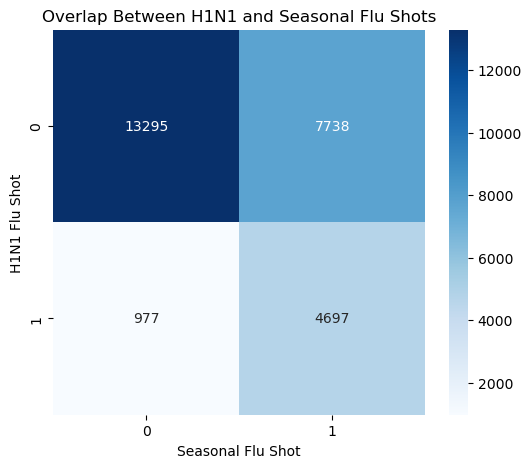

In [8]:

overlap = pd.crosstab(flu_df['h1n1_vaccine'], flu_df['seasonal_vaccine'])

plt.figure(figsize=(6,5))
sns.heatmap(overlap, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Seasonal Flu Shot')
plt.ylabel('H1N1 Flu Shot')
plt.title('Overlap Between H1N1 and Seasonal Flu Shots')
plt.show()


In [ ]:
##################################################
# 1.1.4     QUESTIONS & OBSERVATIONS             #      
##################################################
# EMPLOYMENT & HEALTH INSURANCE HAD THE MOST MISSING VALUES.